# Tendencia de salarios para cientificos de datos del periodo 2021 al 2023
## Introducción
  Este conjunto de datos tiene como objetivo arrojar luz sobre las tendencias salariales en el campo de la ciencia de datos para los años 2021 a 2023. Centrándose en diversos aspectos del empleo, incluida la experiencia laboral, los títulos de los puestos y la ubicación de las empresas, este conjunto de datos proporciona información valiosa sobre los salarios. distribuciones dentro de la industria.

##Descripcion de los datos en detalle:

1.   **work_year:** Representa el año especifico donde se reporto el salario
2.   	**Experience_level:** Representa el nivel de experiencia del empleado categorizado de la siguiente forma: EN (Entry-Level), EX (Experienced), MI (Mid-Level), SE (Senior).
3.   **Employment_type:** Representa el tipode contratacion, representado como FT (Full-Time), CT (Contractor), FL (Freelancer), PT (Part-Time).
4.  Job_title:	El cargo del empleado dentro de la empresa
5.   	**Salary:** El salario correspondiente a su moneda
6.   **Salary_currency:**	El código de moneda que representa el salario.
7.   **Salary_in_usd:**	Las cifras salariales convertidas en USD para una comparación uniforme.
8.   **Company_location:** La ubicación de las empresas, especificada como códigos de país (por ejemplo, "US" para Estados Unidos y "NG" para Nigeria)
9.   **Company_size:** El tamaño de las empresas, clasificadas en "L" (Grande), "M" (Mediana) y "S" (Pequeña).








#Importamos librerías

In [94]:
import pandas as pd
from google.colab import drive
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import re

# Analisis exploratorio de datos (EDA)

##Cargamos dataset

In [99]:
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Coder data science/Sueldo_datasciense/'
df = pd.read_csv('ds_salaries.csv', sep=',')
df.tail(5)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coder data science/Sueldo_datasciense


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


## Informacion adicional de tipos de datos

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## Estadisticas

In [102]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


##Verificamos las columnas

In [103]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

## Verificamos falores nulos

In [104]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [109]:
print(df.isna().sum())

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


##Reemplazamos valores en el dataset

In [110]:
#  Reemplazamos los valores de la columna experience_level por el nivel de experiencia completo
df['experience_level'] = df['experience_level'].replace('EN', 'Entry-Level')
df['experience_level'] = df['experience_level'].replace('EX', 'Experienced')
df['experience_level'] = df['experience_level'].replace('MI', 'Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior')

In [111]:
#Reemplazamos los valores del tipo de contratacion por sus valores completos
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contractor')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Part-Time')

In [112]:
#Reemplazamos los valores del tamaño de compañia por sus valores completos
df['company_size'] = df['company_size'].replace('L', "Large")
df['company_size'] = df['company_size'].replace('M', "Medium")
df['company_size'] = df['company_size'].replace('S', "Small")

In [113]:
#Reemplazamos los valores del remote_ratio de compañia por sus valores completos para ello debemos convertir la columna de remote_ratio a string
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace('100', "Remote")
df['remote_ratio'] = df['remote_ratio'].replace('50', "Hybrid")
df['remote_ratio'] = df['remote_ratio'].replace('0', "In person")


##Creamos variables sinteticas adicionales

In [114]:
#Creamos una nueva variable la cual me indicara el contienente al que pertenece el empleado
country_to_continent = {
    'ES': 'Europa', 'US': 'América', 'CA': 'América', 'DE': 'Europa', 'GB': 'Europa',
    'NG': 'África', 'IN': 'Asia', 'HK': 'Asia', 'NL': 'Europa', 'CH': 'Europa',
    'CF': 'África', 'FR': 'Europa', 'FI': 'Europa', 'UA': 'Europa', 'IE': 'Europa',
    'IL': 'Asia', 'GH': 'África', 'CO': 'América', 'SG': 'Asia', 'AU': 'Oceanía',
    'SE': 'Europa', 'SI': 'Europa', 'MX': 'América', 'BR': 'América', 'PT': 'Europa',
    'RU': 'Europa/Asia', 'TH': 'Asia', 'HR': 'Europa', 'VN': 'Asia', 'EE': 'Europa',
    'AM': 'Asia', 'BA': 'Europa', 'KE': 'África', 'GR': 'Europa', 'MK': 'Europa',
    'LV': 'Europa', 'RO': 'Europa', 'PK': 'Asia', 'IT': 'Europa', 'MA': 'África',
    'PL': 'Europa', 'AL': 'Europa', 'AR': 'América', 'LT': 'Europa', 'AS': 'Oceanía',
    'CR': 'América', 'IR': 'Asia', 'BS': 'América', 'HU': 'Europa', 'AT': 'Europa',
    'SK': 'Europa', 'CZ': 'Europa', 'TR': 'Europa/Asia', 'PR': 'América', 'DK': 'Europa',
    'BO': 'América', 'PH': 'Asia', 'BE': 'Europa', 'ID': 'Asia', 'EG': 'África',
    'AE': 'Asia', 'LU': 'Europa', 'MY': 'Asia', 'HN': 'América', 'JP': 'Asia',
    'DZ': 'África', 'IQ': 'Asia', 'CN': 'Asia', 'NZ': 'Oceanía', 'CL': 'América',
    'MD': 'Europa', 'MT': 'Europa'
}

df['continent'] = df['employee_residence'].map(country_to_continent)

In [115]:
#Creamos una nueva variable la cual me indicara el contienente al que pertenece la

df['continent_company'] = df['company_location'].map(country_to_continent)

In [116]:
#Creamos una nueva variable la cual me indicara el salario mensual de cada empleado
df['monthly_salary_usd'] = df['salary_in_usd'] / 12


In [117]:
#Creamos una nueva variable la cual me indicara true o false si la localidad del empleado es igual a la localidad de la comania
df['same_location'] = df['employee_residence'] == df['company_location']


In [118]:
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [119]:

len(df['job_title'].unique())

93

In [120]:
# Definir patrones comunes para agrupar los títulos
patterns = {
    r'(data ?scientist|science|Science)': 'Data Scientist',
    r'(machine ?learning|ml) ?engineer': 'Machine Learning Engineer',
    r'(business|intelligence|analytics) ?(engineer|analyst)': 'Business Intelligence/Analytics',
    r'(research|science) ?(engineer|scientist)': 'Research Engineer/Scientist',
    r'(deep ?learning|nlp) ?engineer': 'Deep Learning/NLP Engineer',
    r'(data|big ?data) ?(engineer|architect)': 'Data/Big Data Engineer',
    r'(cloud|azure) ?(engineer|architect)': 'Cloud Engineer/Architect',
    r'(etl|data ?ops|operations) ?(engineer|developer|analyst)': 'ETL/Data Ops Engineer',
    r'(manager|lead|head) ?(data|machine learning|ai|analytics)': 'Management/Leadership',
    r'(software) ?(engineer|developer)': 'Software Engineer/Developer',
    r'(financial|finance) ?(analyst|data analyst)': 'Finance Data Analyst',
    r'(product) ?(analyst|scientist|data scientist)': 'Product Analyst/Scientist',
    r'(consultant) ?(data|analytics)': 'Data/Analytics Consultant',
    r'(specialist) ?(data|management)': 'Data/Management Specialist',
    r'(tech ?lead) ?(data|science|engineer)': 'Tech Lead/Data/Engineer',
    r'(lead) ?(data|science|engineer)': 'Lead/Data/Engineer',
    r'(power bi) ?(developer|analyst)': 'Power BI Developer/Analyst',
    r'(3d) ?(computer vision) ?(researcher|engineer)': '3D Computer Vision Researcher/Engineer',
    r'(insight) ?(analyst)': 'Insight Analyst',
    r'(autonomous vehicle) ?(technician|engineer)': 'Autonomous Vehicle Technician/Engineer'
}

# Función para aplicar los patrones y normalizar los títulos
def normalize_title(title, patterns):
    title = title.lower()
    for pattern, replacement in patterns.items():
        if re.search(pattern, title):
            return replacement
    return title

# Aplicar la normalización a la columna 'job_title' directamente en el DataFrame
#df = pd.DataFrame({'job_title': job_titles})
df['job_title'] = df['job_title'].apply(lambda x: normalize_title(x, patterns))

# Mostrar el DataFrame resultante
print(df)

      work_year experience_level employment_type                  job_title  \
0          2023           Senior       Full-Time             Data Scientist   
1          2023        Mid-Level      Contractor  Machine Learning Engineer   
2          2023        Mid-Level      Contractor  Machine Learning Engineer   
3          2023           Senior       Full-Time             Data Scientist   
4          2023           Senior       Full-Time             Data Scientist   
...         ...              ...             ...                        ...   
3750       2020           Senior       Full-Time             Data Scientist   
3751       2021        Mid-Level       Full-Time             Data Scientist   
3752       2020      Entry-Level       Full-Time             Data Scientist   
3753       2020      Entry-Level      Contractor      business data analyst   
3754       2021           Senior       Full-Time             Data Scientist   

       salary salary_currency  salary_in_usd employ

In [121]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Engineer', 'applied scientist',
       'data analyst', 'data modeler', 'Research Engineer/Scientist',
       'Business Intelligence/Analytics', 'data strategist',
       'Data/Big Data Engineer', 'computer vision engineer',
       'data quality analyst', 'compliance data analyst', 'ai developer',
       'data analytics manager', 'business data analyst',
       'staff data analyst', 'ETL/Data Ops Engineer',
       'data devops engineer', 'head of data', 'data manager',
       'machine learning researcher', 'data specialist',
       'Management/Leadership', 'machine learning scientist',
       'mlops engineer', 'ai scientist',
       'Autonomous Vehicle Technician/Engineer',
       'applied machine learning scientist', 'cloud database engineer',
       'Finance Data Analyst', 'data infrastructure engineer',
       'ai programmer', 'bi developer', 'deep learning researcher',
       'bi analyst', 'data analytics specialist',
       'machine learni

In [122]:
#Mostramos el dataframe con los cambios efectuados
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,continent,continent_company,monthly_salary_usd,same_location
0,2023,Senior,Full-Time,Data Scientist,80000,EUR,85847,ES,Remote,ES,Large,Europa,Europa,7153.916667,True
1,2023,Mid-Level,Contractor,Machine Learning Engineer,30000,USD,30000,US,Remote,US,Small,América,América,2500.000000,True
2,2023,Mid-Level,Contractor,Machine Learning Engineer,25500,USD,25500,US,Remote,US,Small,América,América,2125.000000,True
3,2023,Senior,Full-Time,Data Scientist,175000,USD,175000,CA,Remote,CA,Medium,América,América,14583.333333,True
4,2023,Senior,Full-Time,Data Scientist,120000,USD,120000,CA,Remote,CA,Medium,América,América,10000.000000,True


In [123]:
df['company_location'].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

##Tendencia salaria a lo largo de los años de 2021 - 2023


*   El análisis a continuación muestra la tendencia salarial de los científicos de datos desde 2021 hasta 2023



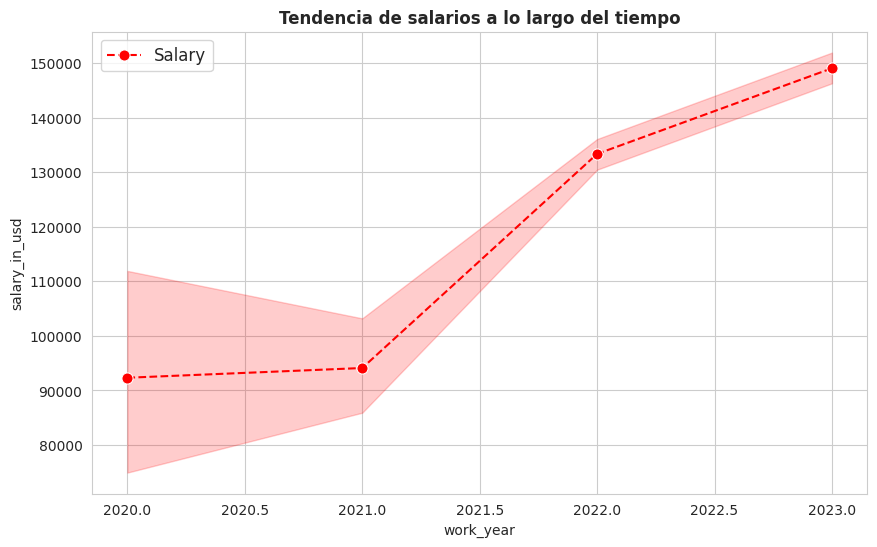

In [124]:

plt.figure(figsize = (10,6))
tendencia_salarial = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
sns.lineplot(data =tendencia_salarial ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='red', markersize=8 )
plt.title('Tendencia de salarios a lo largo del tiempo', fontsize=12, fontweight='bold')

plt.legend(['Salary'], fontsize=12)

plt.show()

**Insights**

*   No hubo muchos cambios en el salario de 2020 a 2021.
*   Se produjeron cambios continuos en el salario de 2021 a 2022.
*   El progreso en el salario de 2022 a 2023 siguió en crecimiento.


##Tendencia salarial a lo largo del tiempo por tamaño de empresa


*   El análisis que sigue examina la evolución de los salarios según el tamaño de la empresa durante el período de 2021 a 2023.




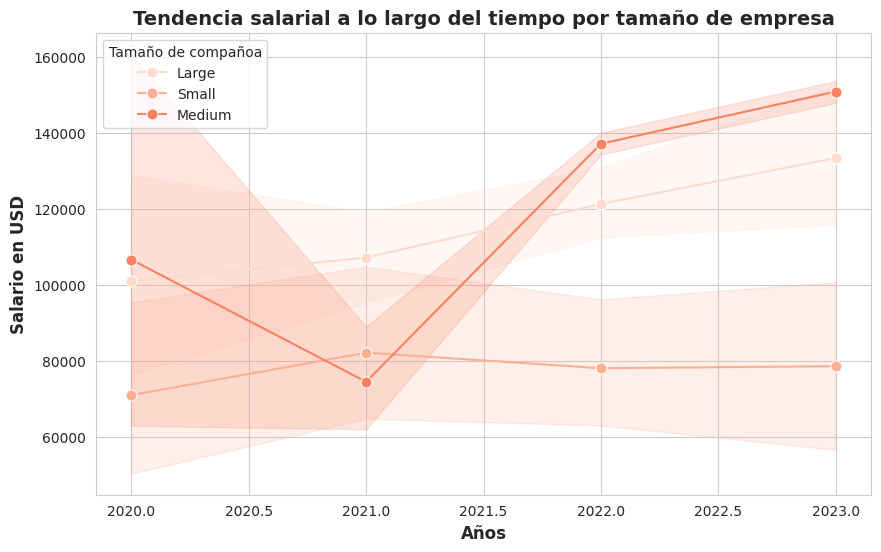

In [125]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o', markersize=8)

plt.xlabel('Años', fontsize=12, fontweight='bold')
plt.ylabel('Salario en USD', fontsize=12, fontweight='bold')

# Leyenda
plt.legend(title='Tamaño de compañoa', title_fontsize=10, fontsize=10, loc='upper left')

# Titulo
plt.title('Tendencia salarial a lo largo del tiempo por tamaño de empresa', fontsize=14, fontweight='bold')

plt.show()

**Insights**

*   La tendencia salarial en las medianas empresas está aumentando encomparación con las pequeñas y grandes empresas.
*   La línea salarial en las grandes empresas no fluctúa tanto como en las medianas.






## Salario promedio en base al nivel de experiencia.


*   El análisis que sigue examina el salario promedio en función del nivel de experiencia.




<ipython-input-126-ed3d5c33e5fd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=exp_salary.index, y=exp_salary.values, palette='Reds')


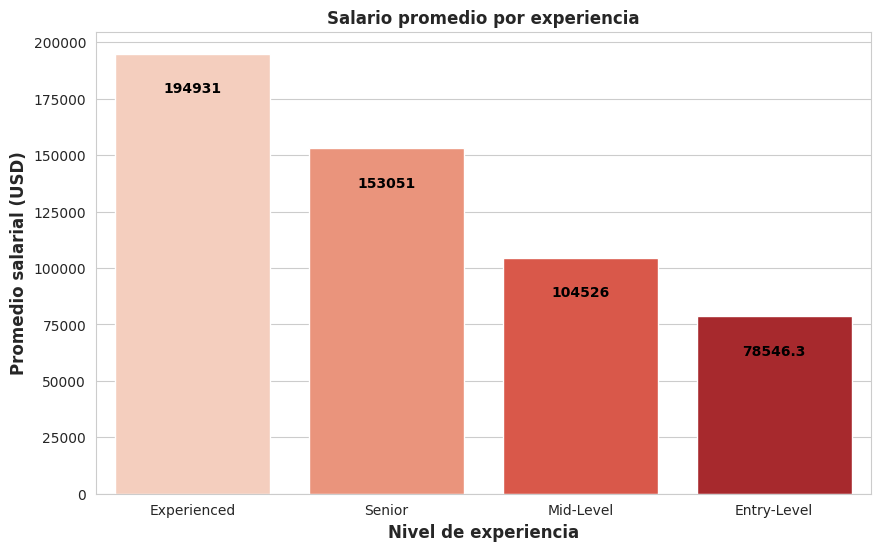

In [126]:

exp_salary = df.groupby('experience_level')['salary_in_usd'].mean()
exp_salary = exp_salary.sort_values(ascending=False)  # Ordenar de mayor a menor

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=exp_salary.index, y=exp_salary.values, palette='Reds')
plt.title('Salario promedio por experiencia', fontsize=12, fontweight='bold')
plt.xlabel('Nivel de experiencia', fontsize=12, fontweight='bold')
plt.ylabel('Promedio salarial (USD)', fontsize=12, fontweight='bold')

# Etiquetar las barras con los valores
for container in ax.containers:
    ax.bar_label(container,
                 label_type="edge",
                 fontsize=10,
                 fontweight='bold',
                 padding=-30,
                 color='Black')

plt.show()

###Insight

*   Profesionales experimentados ganan el salario promedio más alto, aproximadamente 194,931 USD.
*   Los seniors también reciben un salario promedio competitivo de alrededor de 153,062 USD.
*   Los empleados de nivel medio tienen un salario promedio de alrededor de 104,545 USD.
*   Las posiciones de entrada ofrecen un salario promedio más bajo, de aproximadamente 78,546 USD.


##Salario promedio por tipo de empleo (Full-Time, Contractor, Part-time, Freelancer)

*   Este análisis explora el salario promedio según diferentes tipos de empleo: tiempo completo, contratista, tiempo parcial y freelancer.




<ipython-input-127-1ef164de3cb9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(y = emp_salary.values, x = emp_salary.index, palette = 'Reds')


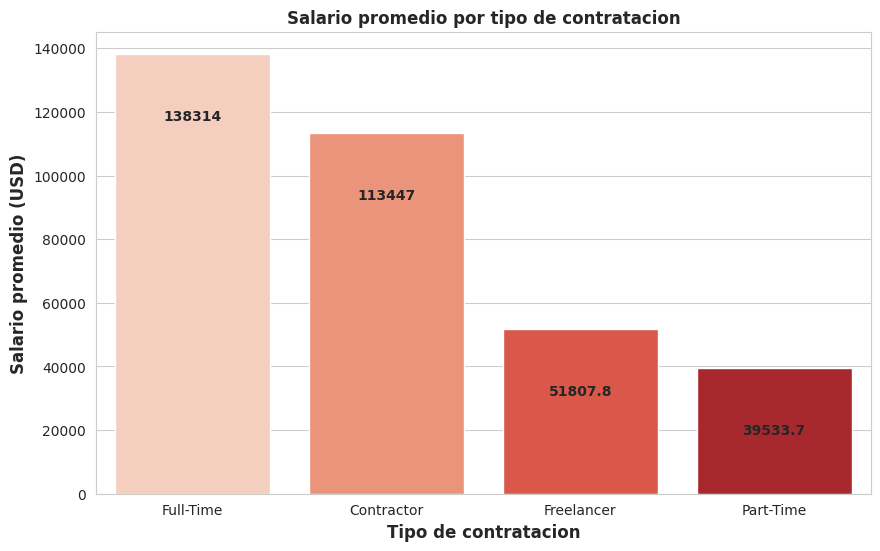

In [127]:
#Group data by 'employment_type' and calculate the average salary for each type
emp_salary = df.groupby('employment_type')['salary_in_usd'].mean()
emp_salary = emp_salary.sort_values(ascending=False)

plt.figure(figsize = (10,6))
p = sns.barplot(y = emp_salary.values, x = emp_salary.index, palette = 'Reds')
plt.title('Salario promedio por tipo de contratacion', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de contratacion', fontsize=12, fontweight='bold')
plt.ylabel('Salario promedio (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    plt.bar_label(container,
                padding = -50,
                fontsize = 10,
                label_type="edge",
                fontweight = 'bold',
                rotation = 0

                 )
plt.show()

###Insight

*   Los empleados de tiempo completo tienen el salario promedio más alto con aproximadamente 138.298 USD.
*   Los autónomos y los trabajadores a tiempo parcial tienen salarios medios más bajos, alrededor de 51.808 dólares y 39.534 dólares.







##Salario Promedio por cargo (Top 10)

*   En el panorama global de la Tecnología de la Información (TI), el salario es un factor clave que refleja la competitividad y el atractivo de diferentes países para los profesionales y expertos en esta industria. El análisis de los salarios promedio por empresa revela importantes insights sobre las tendencias y disparidades salariales que impactan a los trabajadores de TI en todo el mundo dando a conocer cuales son las compañias con sueldos mas altos.

<ipython-input-128-aa1bed7565e2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x= job_title_salary.values[:10], y = job_title_salary.index[:10], palette = 'Reds')


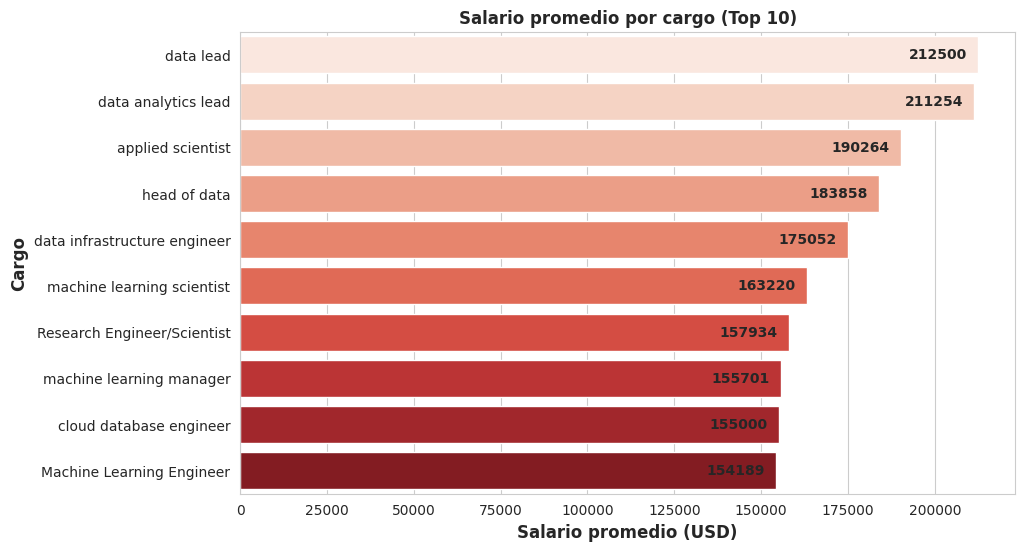

In [128]:

job_title_salary= df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending = False)

plt.figure(figsize = (10,6))
p = sns.barplot(x= job_title_salary.values[:10], y = job_title_salary.index[:10], palette = 'Reds')

plt.title('Salario promedio por cargo (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Salario promedio (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Cargo', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,padding = -50,
                fontweight = 'bold')


plt.show()

### Insight

*   Data Science Tech Lead tiene el salario promedio más alto con 375.000 USD.
*   Cloud Data Architect y Data Lead también tienen salarios notablemente altos.
*   Los 10 puestos de trabajo principales muestran un gran potencial de ingresos en el campo de la ciencia de datos.



##Sueldos promedios por ubicacion de la empresa

*   Este análisis se centra en los sueldos promedio según la ubicación de la empresa.


<ipython-input-129-2b39779bc803>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(10), palette = 'Reds')


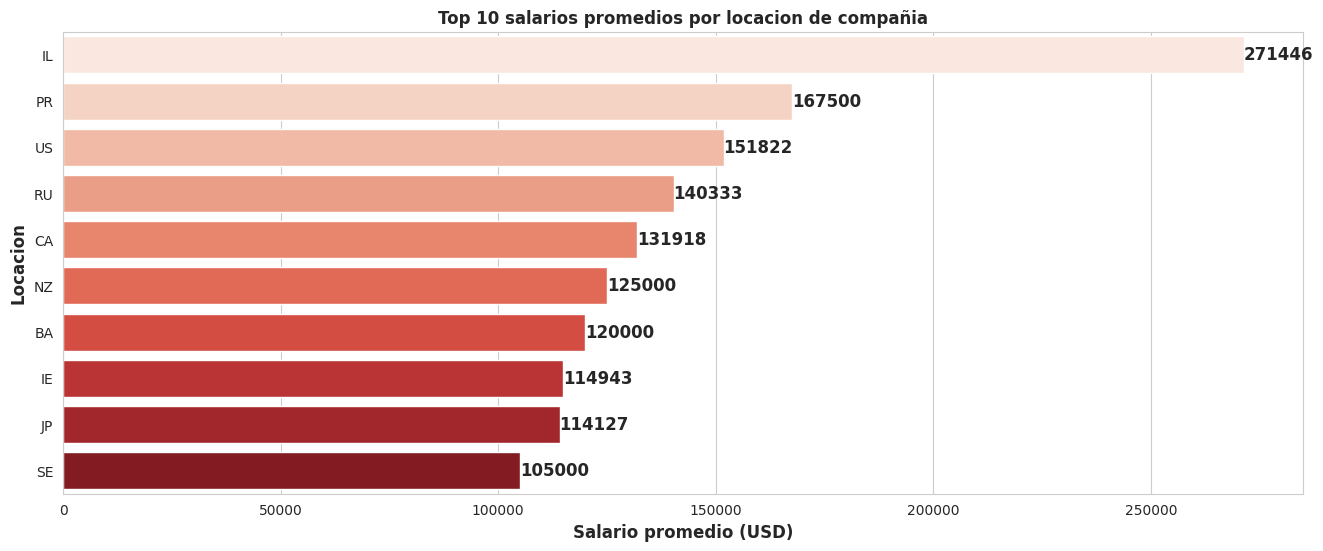

In [129]:
# Group the data by company_location and calculate the mean salary for each location
average_salaries_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Sort the locations by average salary in descending order
average_salaries_by_location = average_salaries_by_location.sort_values(by='salary_in_usd', ascending=False)

# Create a bar chart to visualize average salaries by country
plt.figure(figsize=(16, 6))
p = sns.barplot(x='salary_in_usd', y='company_location', data=average_salaries_by_location.head(10), palette = 'Reds')
plt.title('Top 10 salarios promedios por locacion de compañia', fontsize=12, fontweight='bold' )
plt.xlabel('Salario promedio (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Locacion', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                fontsize = 12,
                label_type="edge",
                fontweight = 'bold'
               )
plt.show()

###Insight

*   En Israel (IL), el salario promedio en ciencia de datos es notablemente alto, aproximadamente 271,447 USD.
*   Puerto Rico (PR) y Estados Unidos (EE.UU.) también ofrecen salarios promedio competitivos, con aproximadamente 167,500 USD y 151,801 USD, respectivamente.
*   Rusia (RU) y Canadá (CA) tienen salarios promedio en ciencia de datos de alrededor de 140.333 USD y 131.918 USD, respectivamente.
*   Nueva Zelanda (NZ), Bosnia y Herzegovina (BA), Irlanda (IE), Japón (JP) y Suecia (SE) completan los principales lugares con salarios promedio variables.


## Salario promedio en base al tamaño de la compañia

*   El análisis de los salarios promedio por el tamaño de la empresa revela importantes insights sobre las tendencias y disparidades salariales que impactan a los trabajadores de TI en todo el mundo

<ipython-input-130-1250a1a1ee18>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x=company_size_salary.index, y=company_size_salary.values, palette = 'Reds')


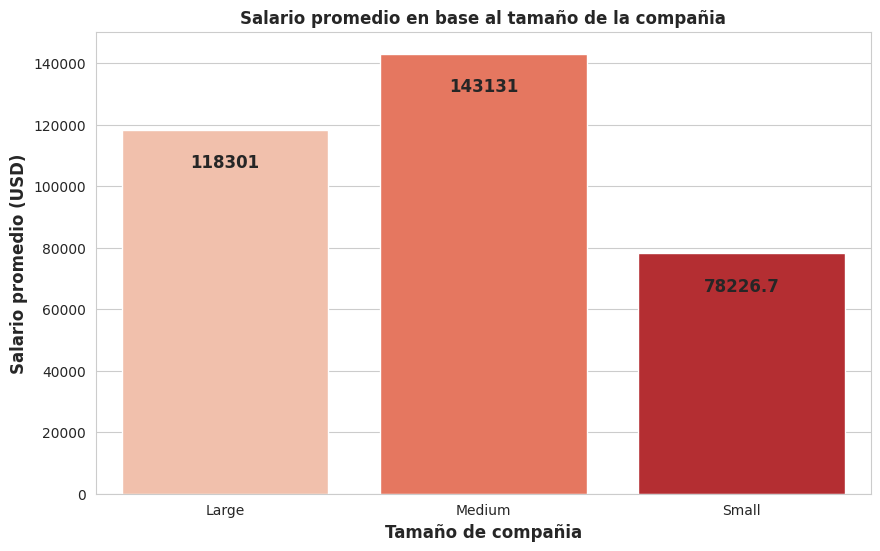

In [130]:
# Group data by 'company_size' and calculate the average salary for each size
company_size_salary = df.groupby('company_size')['salary_in_usd'].mean()


# Plot the average salary by company size
plt.figure(figsize=(10, 6))
p = sns.barplot(x=company_size_salary.index, y=company_size_salary.values, palette = 'Reds')
plt.title('Salario promedio en base al tamaño de la compañia', fontsize=12, fontweight='bold')
plt.xlabel('Tamaño de compañia',fontsize=12, fontweight='bold')
plt.ylabel('Salario promedio (USD)', fontsize=12, fontweight='bold')


for container in p.containers:
    p.bar_label(container, fontweight = 'bold',
                padding = -30,
                fontsize=12,

               )


plt.show()

###Insights


*   Las empresas de tamaño mediano ofrecen el salario promedio más alto, aproximadamente 143,117 USD.
*   Le siguen las grandes empresas con un promedio de alrededor de 118,306 USD.
*   Las empresas pequeñas ofrecen un salario promedio más bajo de alrededor de 78,227 USD.

##Salario promedio por ubicación de la empresa y tamaño de la empresa.

*   Este análisis examina el salario promedio según la ubicación y el tamaño de la empresa, proporcionando una visión detallada de cómo estos factores impactan los ingresos de los empleados.

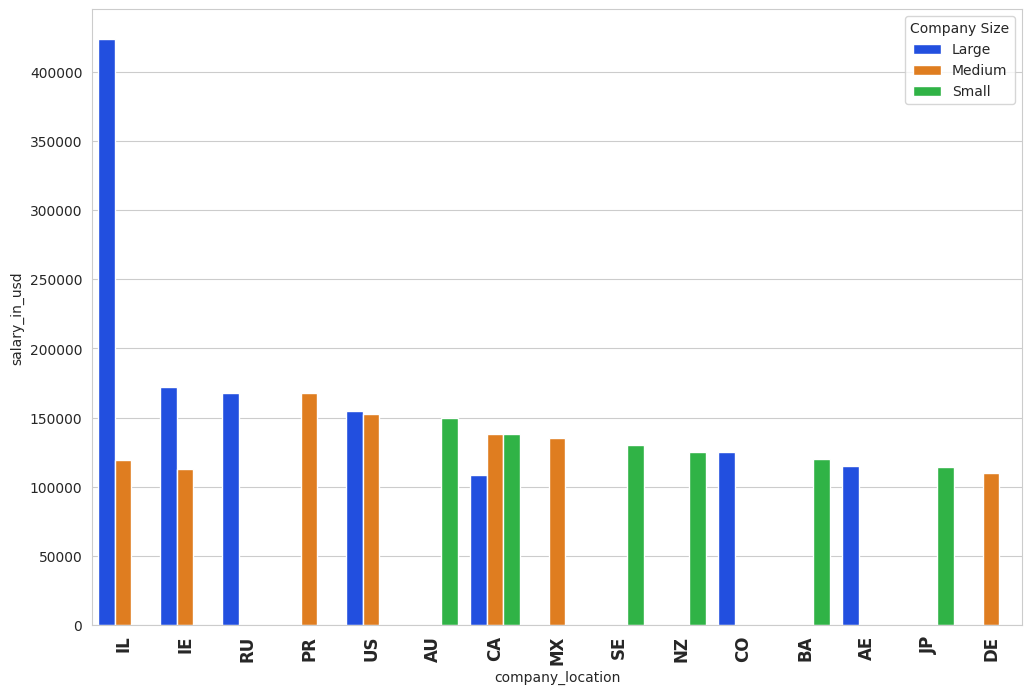

In [131]:
cost_effectiveness = df.groupby(['company_location', 'company_size'])['salary_in_usd'].mean().reset_index().sort_values(by = 'salary_in_usd', ascending = False)[:20]


# Create a bar plot using Seaborn with x and y axes swapped
plt.figure(figsize=(12, 8))

# Use a different color palette for a modern look
sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='company_location', y='salary_in_usd', hue='company_size', data=cost_effectiveness)
plt.xticks(rotation=90, fontsize=12, fontweight='bold')


lg = plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper right')

# Show the plot
plt.show()

###Insight

En Israel las empresas de tamaño grande ofrecen en promedio sueldos superiores a 400,000 USD anual

##Identificamos y eliminamos los outliers

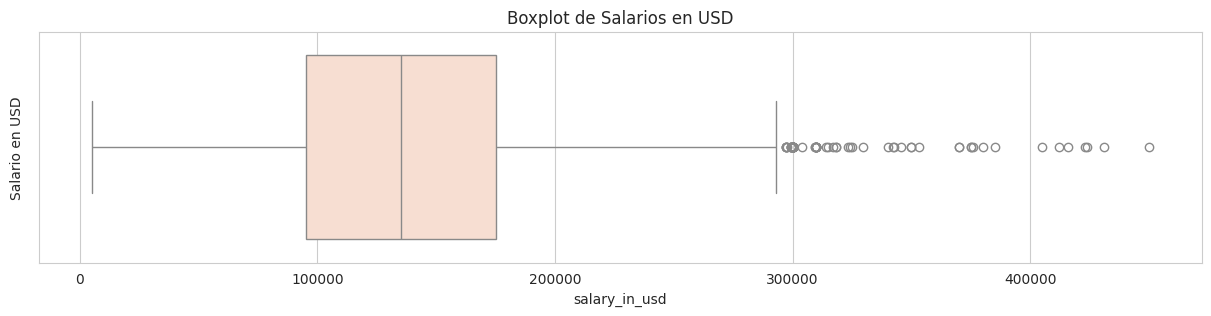

In [144]:

sns.set_style("whitegrid")
sns.set_palette("Reds")

# Graficar boxplot
plt.figure(figsize=(15, 3))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Boxplot de Salarios en USD')
plt.ylabel('Salario en USD')
plt.show()

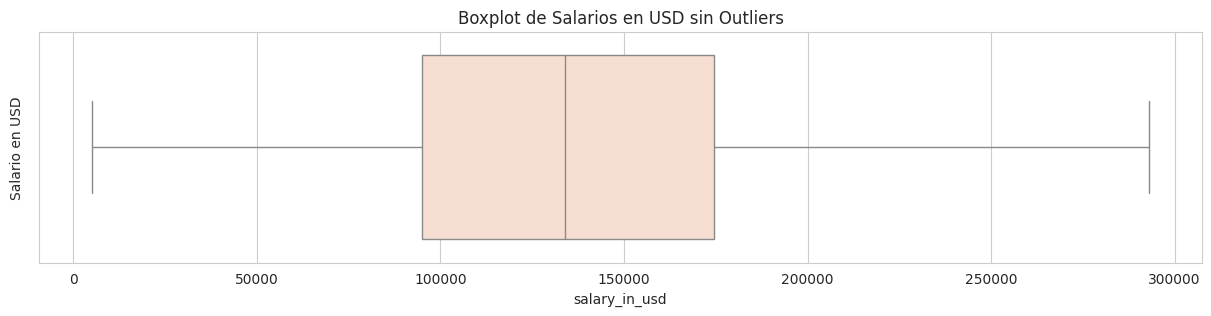

In [132]:
# Suponiendo que 'df' es tu DataFrame y 'salary_in_usd' es la columna de interés
# Calcular los cuartiles y el IQR
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
df_clean = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]

# Graficar el boxplot sin los outliers
sns.set_style("whitegrid")
sns.set_palette("Reds")

plt.figure(figsize=(15, 3))
sns.boxplot(x=df_clean['salary_in_usd'])
plt.title('Boxplot de Salarios en USD sin Outliers')
plt.ylabel('Salario en USD')
plt.show()


#Conclusiones



##Tendencia de salarios

*   Cambio mínimo en 2020-2021.
*   Fluctuaciones continuas en 2021-2022.
*   Patrón similar en 2022-2023.

##Impacto del tamaño de la empresa:

*   Las empresas medianas experimentan un crecimiento salarial.
*   Las grandes empresas tienen salarios estables.

##Nivel de experiencia:

*   Los profesionales experimentados ganan más.
*   Le siguen los seniors, luego los de nivel medio y los de entrada.

##Tipos de empleo:

*   Los empleados a tiempo completo tienen el promedio más alto.
*   Los contratistas también ganan bien.
*   Los freelancers y los trabajadores a tiempo parcial ganan menos.

##Principales títulos de trabajo:

*   El Data Science Tech Lead gana más.

##Principales ubicaciones:

*   Israel (IL) ofrece los salarios más altos.

##Impacto del tamaño de la empresa:

*   Las empresas medianas pagan más.

In [145]:
df_clean.head()
df_clean.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
continent             9
continent_company     0
monthly_salary_usd    0
same_location         0
dtype: int64

# Iniciamos el preproceso para aplicar modelado de machine learning que consiste en transformar las variables categoricas a numericas utilizando oneHotEncoder

In [134]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error

from sklearn.impute import SimpleImputer

##Excluimos las columnas que no son relevantes para la predicción

In [135]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'continent',
       'continent_company', 'monthly_salary_usd', 'same_location'],
      dtype='object')

In [136]:

columns_to_exclude = ['salary_currency', 'employee_residence', 'salary', 'work_year' ]
df_cleaned_out = df.drop(columns=columns_to_exclude)


### Codificamos las variables categóricas utilizando OneHotEncoder

In [137]:
columns_to_encode = ['job_title','experience_level','company_size','company_location','employment_type','remote_ratio','monthly_salary_usd','same_location','continent','continent_company']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df_cleaned_out[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
final_df = pd.concat([df_cleaned_out.drop(columns=columns_to_encode), encoded_df], axis=1)

### Separar las features (variables predictoras) de la variable objetivo

In [138]:
X = final_df.drop('salary_in_usd', axis=1)
y = final_df['salary_in_usd']

In [139]:
from sklearn.decomposition import PCA

# Aplicamos PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# obtenemos los componentes PCA
pca_components = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])

# Identificamos las variables mas relevantes
relevant_variables_pc1 = pca_components.loc['PC1'].abs().sort_values(ascending=False).head(10)
relevant_variables_pc2 = pca_components.loc['PC2'].abs().sort_values(ascending=False).head(10)

print("Variables relevantes for PC1:")
print(relevant_variables_pc1)
print("\n Variables relevantes for PC2:")
print(relevant_variables_pc2)

Variables relevantes for PC1:
remote_ratio_In person              0.552232
remote_ratio_Remote                 0.471099
experience_level_Senior             0.346051
company_location_US                 0.320229
experience_level_Mid-Level          0.253274
continent_company_Europa            0.227037
continent_Europa                    0.226754
company_size_Medium                 0.213831
job_title_Data/Big Data Engineer    0.091369
company_location_GB                 0.087708
Name: PC1, dtype: float64

 Variables relevantes for PC2:
remote_ratio_Remote                 0.515687
remote_ratio_In person              0.437996
experience_level_Senior             0.395880
experience_level_Mid-Level          0.333580
company_location_US                 0.304910
continent_company_Europa            0.270645
continent_Europa                    0.269244
company_location_GB                 0.122172
company_size_Medium                 0.079801
job_title_Data/Big Data Engineer    0.071437
Name: PC2, d

##Interpretación General:
Condiciones de Trabajo (Remoto vs. En Persona):
Ambas proporciones (remoto y en persona) tienen las cargas más altas en ambos componentes, indicando que las condiciones de trabajo son factores determinantes clave en la variabilidad de los datos.

Nivel de Experiencia:
Los niveles de experiencia, especialmente Senior y Mid-Level, son altamente influyentes en ambos componentes, lo que sugiere que la experiencia laboral es crucial.

Ubicación Geográfica:
La ubicación de la empresa y del empleado, especialmente en EE.UU. y Europa, son factores importantes.

Tamaño de la Empresa:
Las empresas de tamaño mediano también tienen una influencia significativa.

Título del Trabajo:
Aunque menos influyente que las otras variables, el título del trabajo (especialmente roles de ingeniero de datos/Big Data) también contribuye a la variabilidad explicada por los componentes.


## Dividimos el dataset en conjuntos de entrenamiento y prueba

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar que no hay valores no numéricos en final_df
#print(final_df.dtypes)
#print(final_df.head())
final_df.columns

Index(['salary_in_usd', 'job_title_Autonomous Vehicle Technician/Engineer',
       'job_title_Business Intelligence/Analytics', 'job_title_Data Scientist',
       'job_title_Data/Big Data Engineer',
       'job_title_Deep Learning/NLP Engineer',
       'job_title_ETL/Data Ops Engineer', 'job_title_Finance Data Analyst',
       'job_title_Insight Analyst', 'job_title_Machine Learning Engineer',
       ...
       'continent_Europa', 'continent_Europa/Asia', 'continent_Oceanía',
       'continent_África', 'continent_nan', 'continent_company_Asia',
       'continent_company_Europa', 'continent_company_Europa/Asia',
       'continent_company_Oceanía', 'continent_company_África'],
      dtype='object', length=1180)

## Aplicamos validacion cruzada

In [141]:
# validación cruzada

model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, final_df, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores

print(f"Validación cruzada - Mean Squared Error (MSE) para cada fold: {cv_mse_scores}")
print(f"Validación cruzada - Mean Squared Error (MSE) promedio: {cv_mse_scores.mean()}")

Validación cruzada - Mean Squared Error (MSE) para cada fold: [ 213391.09715353  362856.53539068   88476.83388668   24933.77378429
 8286696.29597217]
Validación cruzada - Mean Squared Error (MSE) promedio: 1795270.9072374706


estos resultados sugieren que el modelo puede necesitar mejoras en términos de generalización para reducir la variabilidad en los resultados y mejorar el rendimiento promedio del modelo en todos los folds

## Aplicamos el modelado RamdomForestRegressor

###Entrenamiento y evaluacion de modelo de RandomForestRegressor con el 20% de los datos

In [142]:

# Inicializar y entrenar el modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
max_err = max_error(y_test, y_pred)

print(f"Evaluación con conjunto de prueba - Mean Squared Error (Random Forest): {mse}")
print(f"Evaluación con conjunto de prueba - R^2 Score (Random Forest): {r2}")
print(f"Evaluación con conjunto de prueba - Mean Absolute Error (Random Forest): {mae}")
print(f"Evaluación con conjunto de prueba - Median Absolute Error (Random Forest): {medae}")
print(f"Evaluación con conjunto de prueba - Explained Variance Score (Random Forest): {evs}")
print(f"Evaluación con conjunto de prueba - Max Error (Random Forest): {max_err}")

Evaluación con conjunto de prueba - Mean Squared Error (Random Forest): 1153636726.0188594
Evaluación con conjunto de prueba - R^2 Score (Random Forest): 0.7077765600229624
Evaluación con conjunto de prueba - Mean Absolute Error (Random Forest): 16665.53221038615
Evaluación con conjunto de prueba - Median Absolute Error (Random Forest): 3785.649999999994
Evaluación con conjunto de prueba - Explained Variance Score (Random Forest): 0.7173928939321328
Evaluación con conjunto de prueba - Max Error (Random Forest): 275567.24


###Entrenamiento y evaluacion de modelo de RandomForestRegressor con todos los datos

In [143]:
# Inicializar y entrenar el modelo de Random Forest con todos los datos
model = RandomForestRegressor(n_estimators=80, random_state=42)
model.fit(X, y)  # Entrenamiento con todos los datos

# Realizar predicciones sobre todos los datos
y_pred_all = model.predict(X)

# Evaluar el rendimiento del modelo con todos los datos
# Evaluar el rendimiento del modelo con todos los datos
mse_all = mean_squared_error(y, y_pred_all)
r2_all = r2_score(y, y_pred_all)
mae_all = mean_absolute_error(y, y_pred_all)
medae_all = median_absolute_error(y, y_pred_all)
evs_all = explained_variance_score(y, y_pred_all)
max_err_all = max_error(y, y_pred_all)

print(f"Evaluación con todos los datos - Mean Squared Error (Random Forest): {mse_all}")
print(f"Evaluación con todos los datos - R^2 Score (Random Forest): {r2_all}")
print(f"Evaluación con todos los datos - Mean Absolute Error (Random Forest): {mae_all}")
print(f"Evaluación con todos los datos - Median Absolute Error (Random Forest): {medae_all}")
print(f"Evaluación con todos los datos - Explained Variance Score (Random Forest): {evs_all}")
print(f"Evaluación con todos los datos - Max Error (Random Forest): {max_err_all}")

Evaluación con todos los datos - Mean Squared Error (Random Forest): 151592800.39380467
Evaluación con todos los datos - R^2 Score (Random Forest): 0.9618629957171454
Evaluación con todos los datos - Mean Absolute Error (Random Forest): 5496.253029294275
Evaluación con todos los datos - Median Absolute Error (Random Forest): 1103.125
Evaluación con todos los datos - Explained Variance Score (Random Forest): 0.9632150756699545
Evaluación con todos los datos - Max Error (Random Forest): 157663.46250000002


### Conclusion en base a los resultados del modelado de RandomForestRegressor

Análisis y Conclusión
Rendimiento en el conjunto de prueba:

El modelo explica aproximadamente el 70,77% de la variabilidad en los datos de prueba. Un R2 de 0.7077 indica un rendimiento moderado, pero hay margen para mejorar.

Rendimiento en todos los datos:
El modelo explica aproximadamente el 96.18% de la variabilidad en todos los datos. Un R2 de 0.9618 es mejor que el rendimiento en el conjunto de prueba, lo que sugiere que el modelo está ajustándose mejor cuando se entrena y evalúa con todo el conjunto de datos.

Tambien hay que aclarar que nos encontramos ante un Overfitting Los resultados sugieren que el modelo está ligeramente sobreajustado. Esto se puede deducir porque el rendimiento del modelo es notablemente mejor cuando se entrena y evalúa con todos los datos en comparación con el conjunto de prueba. Esto indica que el modelo puede estar capturando demasiadas características específicas del conjunto de datos completo, y no generaliza tan bien a datos nuevos (conjunto de prueba).

##**Aplicando Modelado de regresion lineal**

###Entrenamiento y evaluacion de modelo de regresion lineal con el 20% de los datos

In [ ]:
# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)  # Entrenamiento con el conjunto de entrenamiento

# Realizar predicciones sobre el conjunto de prueba
y_pred_test = model.predict(X_test)

# Evaluar el rendimiento del modelo con el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
medae_test = median_absolute_error(y_test, y_pred_test)
evs_test = explained_variance_score(y_test, y_pred_test)
max_err_test = max_error(y_test, y_pred_test)

print(f"Evaluación con conjunto de prueba - Mean Squared Error: {mse_test}")
print(f"Evaluación con conjunto de prueba - R^2 Score: {r2_test}")
print(f"Evaluación con conjunto de prueba - Mean Absolute Error: {mae_test}")
print(f"Evaluación con conjunto de prueba - Median Absolute Error: {medae_test}")
print(f"Evaluación con conjunto de prueba - Explained Variance Score: {evs_test}")
print(f"Evaluación con conjunto de prueba - Max Error: {max_err_test}")

Evaluación con conjunto de prueba - Mean Squared Error: 1311735941.1356063
Evaluación con conjunto de prueba - R^2 Score: 0.6677290342662883
Evaluación con conjunto de prueba - Mean Absolute Error: 13352.143711109788
Evaluación con conjunto de prueba - Median Absolute Error: 1.7462298274040222e-10
Evaluación con conjunto de prueba - Explained Variance Score: 0.6677304838253746
Evaluación con conjunto de prueba - Max Error: 252682.8168136402


###Entrenamiento y evaluacion de modelo de regresion lineal con todos los datos

In [ ]:
# Inicializar y entrenar el modelo de regresión lineal con todos los datos
model.fit(X, y)  # Entrenamiento con todos los datos

# Realizar predicciones sobre todos los datos
y_pred_all = model.predict(X)

# Evaluar el rendimiento del modelo con todos los datos
mse_all = mean_squared_error(y, y_pred_all)
r2_all = r2_score(y, y_pred_all)
mae_all = mean_absolute_error(y, y_pred_all)
medae_all = median_absolute_error(y, y_pred_all)
evs_all = explained_variance_score(y, y_pred_all)
max_err_all = max_error(y, y_pred_all)

print(f"Evaluación con todos los datos - Mean Squared Error: {mse_all}")
print(f"Evaluación con todos los datos - R^2 Score: {r2_all}")
print(f"Evaluación con todos los datos - Mean Absolute Error: {mae_all}")
print(f"Evaluación con todos los datos - Median Absolute Error: {medae_all}")
print(f"Evaluación con todos los datos - Explained Variance Score: {evs_all}")
print(f"Evaluación con todos los datos - Max Error: {max_err_all}")

Evaluación con todos los datos - Mean Squared Error: 2.7367917903986174e-19
Evaluación con todos los datos - R^2 Score: 1.0
Evaluación con todos los datos - Mean Absolute Error: 3.126220307629134e-10
Evaluación con todos los datos - Median Absolute Error: 1.7462298274040222e-10
Evaluación con todos los datos - Explained Variance Score: 1.0
Evaluación con todos los datos - Max Error: 4.511093720793724e-09


### Conclusion en base a los resultados del modelado de regresion lineal

Análisis y Conclusión

Rendimiento en el Conjunto de Datos Completo:

El modelo de regresión lineal muestra un rendimiento inusualmente perfecto en el conjunto de datos completo. Los valores casi nulos del MSE, MAE, MedAE y Max Error, junto con un R² Score y EVS de 1.0, indican que el modelo predice perfectamente los datos de entrenamiento.

Posible Sobreajuste:

Indicación de Sobreajuste (Overfitting): Los resultados son una señal clara de sobreajuste. El modelo ha aprendido los datos de entrenamiento extremadamente bien, pero esto no es una señal positiva ya que puede ser incapaz de generalizar a datos nuevos y no vistos.
Riesgo de Generalización: Dado que el modelo de regresión lineal muestra un rendimiento perfecto en los datos de entrenamiento, es muy probable que no se comporte tan bien con nuevos datos debido a su falta de capacidad de generalización. En otras palabras, el modelo puede fallar significativamente cuando se le presenten datos fuera del conjunto de entrenamiento.


##Eleccion de modelo en base al Bias-Variance tradeoff

Los resultados de la regresión lineal son sorprendentemente perfectos, lo que sugiere un posible sobreajuste (overfitting). Esto puede ocurrir si el modelo es demasiado simple y memoriza los datos de entrenamiento en lugar de aprender las relaciones subyacentes.

En casos reales, es poco probable que un modelo tenga un rendimiento tan perfecto en datos de prueba, y el sobreajuste podría llevar a un rendimiento pobre en datos no vistos.

En base al compromiso sesgo-varianza, el modelo Random Forest es preferible debido a su capacidad de generalizar mejor y evitar el sobreajuste. A pesar de tener mayores errores en comparación con la regresión lineal en los datos de entrenamiento, es probable que el Random Forest tenga un mejor rendimiento en datos no vistos y proporcione predicciones más robustas y fiables en el mundo real.